In [2]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile

In [4]:
with open('res/2-14 Traces/2-26_Fast Fail Biocontainment Code_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-26_Fast Fail Biocontainment Code 2_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC2_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 3_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC3_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 4_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC4_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 5_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC5_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 6_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC6_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 7_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC7_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 8_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC8_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 9_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC9_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Biocontainment Code 10_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    ffBC10_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-26_Standard Code_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    standard_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-26_Fast Fail Code_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    fastfail_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-26_Reductionist Code_favg_traces_T=500_N=5_b=1_l=2.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


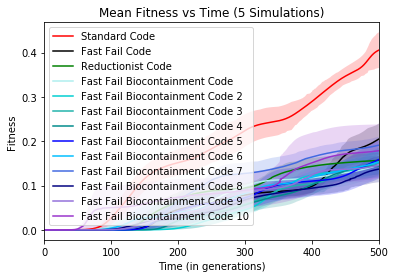

In [5]:
ax1 = sns.tsplot(data=standard_df, time='time', value='value', unit='sim', condition='code', color='red')
ax2 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='black')
ax3 = sns.tsplot(data=reductionist_df, time='time', value='value', unit='sim', condition='code', color='green')
ax4 = sns.tsplot(data=ffBC_df, time='time', value='value', unit='sim', condition='code', color='paleturquoise')
ax5 = sns.tsplot(data=ffBC2_df, time='time', value='value', unit='sim', condition='code', color='darkturquoise')
ax6 = sns.tsplot(data=ffBC3_df, time='time', value='value', unit='sim', condition='code', color='lightseagreen')
ax7 = sns.tsplot(data=ffBC4_df, time='time', value='value', unit='sim', condition='code', color='darkcyan')
ax8 = sns.tsplot(data=ffBC5_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax9 = sns.tsplot(data=ffBC6_df, time='time', value='value', unit='sim', condition='code', color='deepskyblue')
ax10 = sns.tsplot(data=ffBC7_df, time='time', value='value', unit='sim', condition='code', color='royalblue')
ax11 = sns.tsplot(data=ffBC8_df, time='time', value='value', unit='sim', condition='code', color='navy')
ax12 = sns.tsplot(data=ffBC9_df, time='time', value='value', unit='sim', condition='code', color='mediumpurple')
ax13 = sns.tsplot(data=ffBC10_df, time='time', value='value', unit='sim', condition='code', color='darkorchid')
plt.legend()
plt.title('Mean Fitness vs Time (5 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-26_F_avg_T=500_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


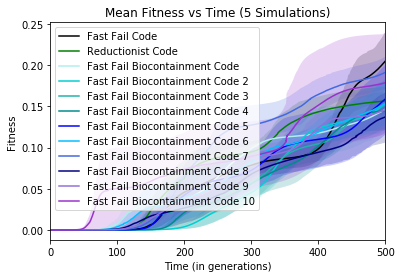

In [6]:
ax1 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='black')
ax2 = sns.tsplot(data=reductionist_df, time='time', value='value', unit='sim', condition='code', color='green')
ax3 = sns.tsplot(data=ffBC_df, time='time', value='value', unit='sim', condition='code', color='paleturquoise')
ax4 = sns.tsplot(data=ffBC2_df, time='time', value='value', unit='sim', condition='code', color='darkturquoise')
ax5 = sns.tsplot(data=ffBC3_df, time='time', value='value', unit='sim', condition='code', color='lightseagreen')
ax6 = sns.tsplot(data=ffBC4_df, time='time', value='value', unit='sim', condition='code', color='darkcyan')
ax7 = sns.tsplot(data=ffBC5_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax8 = sns.tsplot(data=ffBC6_df, time='time', value='value', unit='sim', condition='code', color='deepskyblue')
ax9 = sns.tsplot(data=ffBC7_df, time='time', value='value', unit='sim', condition='code', color='royalblue')
ax10 = sns.tsplot(data=ffBC8_df, time='time', value='value', unit='sim', condition='code', color='navy')
ax11 = sns.tsplot(data=ffBC9_df, time='time', value='value', unit='sim', condition='code', color='mediumpurple')
ax12 = sns.tsplot(data=ffBC10_df, time='time', value='value', unit='sim', condition='code', color='darkorchid')
plt.legend()
plt.title('Mean Fitness vs Time (5 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-26_ff_F_avg_T=500_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


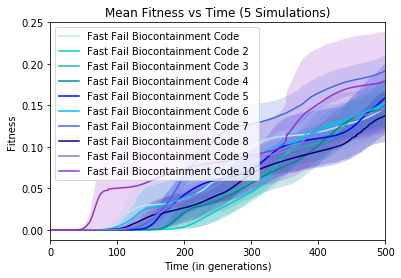

In [5]:
ax1 = sns.tsplot(data=ffBC_df, time='time', value='value', unit='sim', condition='code', color='paleturquoise')
ax2 = sns.tsplot(data=ffBC2_df, time='time', value='value', unit='sim', condition='code', color='darkturquoise')
ax3 = sns.tsplot(data=ffBC3_df, time='time', value='value', unit='sim', condition='code', color='lightseagreen')
ax4 = sns.tsplot(data=ffBC4_df, time='time', value='value', unit='sim', condition='code', color='darkcyan')
ax5 = sns.tsplot(data=ffBC5_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax6 = sns.tsplot(data=ffBC6_df, time='time', value='value', unit='sim', condition='code', color='deepskyblue')
ax7 = sns.tsplot(data=ffBC7_df, time='time', value='value', unit='sim', condition='code', color='royalblue')
ax8 = sns.tsplot(data=ffBC8_df, time='time', value='value', unit='sim', condition='code', color='navy')
ax9 = sns.tsplot(data=ffBC9_df, time='time', value='value', unit='sim', condition='code', color='mediumpurple')
ax10 = sns.tsplot(data=ffBC10_df, time='time', value='value', unit='sim', condition='code', color='darkorchid')
plt.legend()
plt.title('Mean Fitness vs Time (5 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-26_ff_F_avg_T=500_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()